In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install -r """/content/drive/MyDrive/LSM_upgrad_case study/requirements.txt"""

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [13]:
train = pd.read_csv("/content/drive/MyDrive/LSM_upgrad_case study/train.csv")
test = pd.read_csv("/content/drive/MyDrive/LSM_upgrad_case study/test.csv")

In [14]:
print(train.shape)
print(test.shape)

(6922, 88)
(2308, 88)


In [15]:
train.drop("Unnamed: 0", axis = 1, inplace = True)
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [16]:
train.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)
test.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [17]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [18]:
pd.set_option('display.max_columns', 500)

In [19]:
x_train.head()

,Tags_Will revert after reading the email,Total Time Spent on Website,Lead Profile_Potential Lead,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Profile_Unspecified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Last Notable Activity_Modified,What is your current occupation_Unemployed,Last Activity_Olark Chat Conversation,Lead Source_Welingak Website,TotalVisits,Tags_switched off,Tags_Not doing further education,Lead Origin_Lead Import,Specialization_Operations Management,Specialization_Unspecified,Do Not Email_Yes,Tags_Interested in full time MBA,How did you hear about X Education_SMS,Last Notable Activity_Resubscribed to emails,Last Activity_Converted to Lead,Last Activity_Email Bounced,What matters most to you in choosing a course_Other,How did you hear about X Education_Online Search,Lead Origin_Landing Page Submission,Tags_Lost to Others,What is your current occupation_Other,A free copy of Mastering The Interview_Yes,Tags_Shall take in the next coming month,Tags_Lost to EINS,Last Activity_View in browser link Clicked,Lead Source_welearnblog_Home,Page Views Per Visit,Lead Profile_Student of SomeSchool,Lead Source_Others,How did you hear about X Education_Student of SomeSchool,Tags_Diploma holder (Not Eligible),Lead Source_WeLearn,Lead Source_testone,Lead Source_Organic Search,Specialization_Finance Management,How did you hear about X Education_Word Of Mouth,Last Activity_Had a Phone Conversation,Last Activity_Form Submitted on Website,Last Notable Activity_Email Marked Spam,Last Notable Activity_Unsubscribed,City_Other Cities,Specialization_International Business,Last Notable Activity_Email Bounced,Tags_In confusion whether part time or DLP,How did you hear about X Education_Unspecified,Specialization_Human Resource Management,Lead Profile_Lateral Student,Specialization_Retail Management,Tags_Lateral student,Lead Source_youtubechannel,City_Other Metro Cities,Last Notable Activity_Had a Phone Conversation,Lead Source_Referral Sites,Tags_Still Thinking,Last Activity_Unsubscribed,Specialization_IT Projects Management,Specialization_Services Excellence,Lead Source_Olark Chat,Last Notable Activity_Form Submitted on Website,What is your current occupation_Student,Tags_Interested in Next batch,Last Activity_Resubscribed to emails,Lead Source_Google,Specialization_Travel and Tourism,City_Tier II Cities,How did you hear about X Education_Other,Last Activity_Visited Booth in Tradeshow,Last Activity_Page Visited on Website,Lead Source_Press_Release,Tags_in touch with EINS,Tags_opp hangup,Last Notable Activity_Olark Chat Conversation,Specialization_Marketing Management,City_Other Cities of Maharashtra
0,1,1.162019,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.563934,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.205465,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-0.065805,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0.172652,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.492198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,-0.501838,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-0.105605,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.410242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,-0.890436,0,1,1,0,0,0,1,0,0,1,0,1,0,0,-0.383861,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.169195,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,-0.886787,0,0,1,0,0,0,1,0,0,1,1,1,0,0,-0.383861,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.169195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')

In [21]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [22]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [23]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [24]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9088433884676659
Adaboost : 0.9062426494507418
ExtraTree : 0.901910100175996
BaggingClassifier : 0.9014755315333349
GradientBoosting : 0.9120211195355704
DecisionTree : 0.8773496734479395
KNN : 0.8835602098607878
Logistic : 0.9058093319654015
SGD Classifier : 0.8980066978621892
MLPClassifier : 0.9014755315333349
NaiveBayes : 0.8133473462953231
SVM : 0.9108644245927483
[LightGBM] [Info] Number of positive: 2378, number of negative: 3851
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 6229, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381763 -> initscore=-0.482073
[LightGBM] [Info] Start training from score -0.482073
[LightGBM] [Info] Number of positive: 2378, number of nega

Based on the above results, we will be choosing the **RandomForest Classifier, GradientBoosting, LightGBM & Catboost** on which we are going to test the other metrics to see in depth performance of these 4 models based on several different metrics to choose the best model for our analysis.

In [28]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model = model.fit(x_train, y_train)

    # Predictions
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)

    # Accuracy Scores
    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("---------------------------------------------------------")

    # Accuracy Errors
    print("\n**Accuracy Error**")
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    print(f"Train Error: {train_error:.4f}")
    print(f"Test Error: {test_error:.4f}")
    print("---------------------------------------------------------")

    # Classification Reports
    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict=True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict=True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")

    # Confusion Matrices
    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print(train_conf)
    print("\n Test Confusion Matrix Report:")
    print(test_conf)



In [25]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)

    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")

    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")

    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")

    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

### RANDOM FOREST CLASSIFIER

In [26]:
rforest = RandomForestClassifier(random_state= 42)

In [29]:
evaluate_model(rforest, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy: 0.9857
Test Accuracy: 0.9129
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0143
Test Error: 0.0871
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.981123     0.993406  0.985698     0.987265      0.985813
recall        0.996027     0.968975  0.985698     0.982501      0.985698
f1-score      0.988519     0.981038  0.985698     0.984779      0.985663
support    4279.000000  2643.000000  0.985698  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.912172    0.914153  0.912912     0.913162      0.912957
recall        0.946877    0.861202  0.912912     0.904040      0.912912
f1-score      0.929200    0.886888  0.912912     0.908044      0.912426
support    1393.000000

### GRADIENT BOOSTING CLASSIFIER

In [30]:
GradientBoost = GradientBoostingClassifier(random_state = 42)

In [31]:
evaluate_model(GradientBoost, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy: 0.9195
Test Accuracy: 0.9155
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0805
Test Error: 0.0845
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.912090     0.933500  0.919532     0.922795      0.920265
recall        0.962608     0.849792  0.919532     0.906200      0.919532
f1-score      0.936669     0.889681  0.919532     0.913175      0.918728
support    4279.000000  2643.000000  0.919532  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.911401    0.922535  0.915511     0.916968      0.915815
recall        0.952620    0.859016  0.915511     0.905818      0.915511
f1-score      0.931555    0.889643  0.915511     0.910599      0.914939
support    1393.000000

### LIGHTGBM CLASSIFIER

In [33]:
lgbm = LGBMClassifier(random_state=42)

In [34]:
evaluate_model(lgbm, x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2643, number of negative: 4279
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 6922, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381826 -> initscore=-0.481805
[LightGBM] [Info] Start training from score -0.481805
**Accuracy Score**
Train Accuracy: 0.9484
Test Accuracy: 0.9142
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0516
Test Error: 0.0858
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted av

### CATBOOST CLASSIFIER

In [35]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)

In [36]:
evaluate_model(catboost_classif, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy: 0.9442
Test Accuracy: 0.9129
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0558
Test Error: 0.0871
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.939688     0.952305  0.944236     0.945996      0.944506
recall        0.972190     0.898978  0.944236     0.935584      0.944236
f1-score      0.955663     0.924873  0.944236     0.940268      0.943907
support    4279.000000  2643.000000  0.944236  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.915042    0.909404  0.912912     0.912223      0.912807
recall        0.943288    0.866667  0.912912     0.904977      0.912912
f1-score      0.928950    0.887521  0.912912     0.908236      0.912526
support    1393.000000

## Models Evaluation and Performance Benchmarking

## A) Model Accuracy:

**1) Random Forest:**
- Train Accuracy: 98.47%
- Test Accuracy: 91.69%

**2) Gradient Boosting:**
- Train Accuracy: 91.74%
- Test Accuracy: 91.66%

**3) LightGBM:**
- Train Accuracy: 94.58%
- Test Accuracy: 91.55%

**4) CatBoost:**
- Train Accuracy: 94.05%
- Test Accuracy: 92.02%

## B) Model Precision:

**1) Random Forest:**
- Train Precision (Class 0): 97.95%
- Train Precision (Class 1): 99.30%
- Test Precision (Class 0): 91.84%
- Test Precision (Class 1): 91.42%

*Note: Precision scores reduced on the testing dataset, indicating potential parameter adjustments.*

**2) Gradient Boosting:**
- Train Precision (Class 0): 90.71%
- Train Precision (Class 1): 93.63%
- Test Precision (Class 0): 91.37%
- Test Precision (Class 1): 92.18%

**3) LightGBM:**
- Train Precision (Class 0): 94.12%
- Train Precision (Class 1): 95.37%
- Test Precision (Class 0): 92.11%
- Test Precision (Class 1): 90.56%

**4) CatBoost:**
- Train Precision (Class 0): 93.43%
- Train Precision (Class 1): 95.15%
- Test Precision (Class 0): 92.07%
- Test Precision (Class 1): 91.91%

## C) F1-Score:

**1) Random Forest:**
- Train F1-Score (Class 0): 98.75%
- Train F1-Score (Class 1): 97.99%
- Test F1-Score (Class 0): 93.42%
- Test F1-Score (Class 1): 88.73%

**2) Gradient Boosting:**
- Train F1-Score (Class 0): 93.45%
- Train F1-Score (Class 1): 88.80%
- Test F1-Score (Class 0): 93.42%
- Test F1-Score (Class 1): 88.58%

**3) LightGBM:**
- Train F1-Score (Class 0): 95.64%
- Train F1-Score (Class 1): 92.83%
- Test F1-Score (Class 0): 93.27%
- Test F1-Score (Class 1): 88.62%

**4) CatBoost:**
- Train F1-Score (Class 0): 95.23%
- Train F1-Score (Class 1): 92.09%
- Test F1-Score (Class 0): 93.68%
- Test F1-Score (Class 1): 89.17%

For further analysis, focusing on Random Forest and CatBoost classifiers for hyperparameter tuning due to their potential for improved True Positives and True Negatives while minimizing False Negatives in the confusion matrix.


### Random Forest Hyperparameter Tuning

In [51]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

In [52]:
rf_params = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]

In [53]:
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [54]:
best_rf_model = random_search.fit(x_train, y_train)

In [55]:
best_rf_model.best_params_

{'classifier__n_estimators': 900,
 'classifier__min_samples_split': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__max_features': 'auto',
 'classifier__max_depth': 100,
 'classifier__bootstrap': False,
 'classifier': RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                        min_samples_split=7, n_estimators=900)}

In [56]:
print("Best Score: %s" %(best_rf_model.best_score_))

Best Score: 0.9128890056635722


In [57]:
best_rf_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=100,
                                        max_features='auto',
                                        min_samples_split=7,
                                        n_estimators=900))])

In [58]:
rf_classif_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42))])

In [59]:
rf_classif_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, max_features='auto',
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [60]:
test_prediction = rf_classif_pipeline.predict(x_test)

In [61]:
accuracy_score(y_test, test_prediction)

0.915944540727903

In [87]:
def check_metric(y_test, y_predict):
    """
    Evaluate classification metrics for model performance.

    Parameters:
    - y_test: True labels from the test set.
    - y_predict: Predicted labels from the model.

    Returns:
    None (Prints evaluation metrics)
    """

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_predict)
    print("**Accuracy Score**")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("---------------------------------------------------------")

    # Calculate error
    test_error = 1 - test_accuracy
    print("\n**Accuracy Error**")
    print(f"Test Error: {test_error:.4f}")
    print("---------------------------------------------------------")

    # Display classification report
    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict=True))
    print("Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")

    # Display confusion matrix
    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("Test Confusion Matrix Report:")
    print(test_conf)

In [88]:
check_metric(y_test, test_prediction)

**Accuracy Score**
Test Accuracy: 0.9159
---------------------------------------------------------

**Accuracy Error**
Test Error: 0.0841
---------------------------------------------------------

**Classification Report**
Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.914305    0.918699  0.915945     0.916502      0.916047
recall        0.949749    0.864481  0.915945     0.907115      0.915945
f1-score      0.931690    0.890766  0.915945     0.911228      0.915466
support    1393.000000  915.000000  0.915945  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**
Test Confusion Matrix Report:
[[1323   70]
 [ 124  791]]


### Cat Boost Hyperparameter Tuning

In [64]:
cb_new_pipeline = Pipeline([('transformer', ct), ('classifier', CatBoostClassifier(random_state=42, task_type = 'CPU', silent = True, eval_metric = 'accuracy'))])

In [65]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [66]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [67]:
cb_random_search.fit(x_train, y_train)

0:	learn: 0.3309665	total: 15.6ms	remaining: 140ms
1:	learn: 0.2632760	total: 31.3ms	remaining: 125ms
2:	learn: 0.2449194	total: 46.6ms	remaining: 109ms
3:	learn: 0.2274023	total: 62.4ms	remaining: 93.7ms
4:	learn: 0.2203023	total: 77.5ms	remaining: 77.5ms
5:	learn: 0.2149642	total: 92.7ms	remaining: 61.8ms
6:	learn: 0.2096308	total: 108ms	remaining: 46.3ms
7:	learn: 0.2095949	total: 111ms	remaining: 27.7ms
8:	learn: 0.2042275	total: 127ms	remaining: 14.1ms
9:	learn: 0.2001275	total: 142ms	remaining: 0us


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('se',
                                                                               StandardScaler(),
                                                                               ['Total '
                                                                                'Time '
                                                                                'Spent '
                                                                                'on '
                                                                                'Website',
                                                                                'Page '
                                                                                'Views '
                                                                                'Per '
                                                                                'Visit',
                                                                                'TotalVisits'])])),
                                             ('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x7892d42e43a0>)]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [<catb...fier object at 0x7892d42e4cd0>],
                                         'classifier__border_count': [50, 100,
                                                                      150, 200,
                                                                      254],
                                         'classifier__depth': [2, 4, 6, 8, 10,
                                                               12],
                                         'classifier__iterations': [10],
                                         'classifier__l2_leaf_reg': [2, 3, 5, 7,
                                                                     9, 11, 12,
                                                                     15, 18, 20,
                                                                     25, 27],
                                         'classifier__learning_rate': [0.0001,
                                                                       0.001,
                                                                       0.003,
                                                                       0.005,
                                                                       0.01,
                                                                       0.05,
                                                                       0.1, 0.5,
                                                                       1.0],
                                         'classifier__random_strength': [1]}],
                   random_state=42, scoring='accuracy')

In [68]:
cb_random_search.best_params_

{'classifier__random_strength': 1,
 'classifier__learning_rate': 0.5,
 'classifier__l2_leaf_reg': 7,
 'classifier__iterations': 10,
 'classifier__depth': 10,
 'classifier__border_count': 50,
 'classifier': <catboost.core.CatBoostClassifier at 0x7892d42e4cd0>}

In [69]:
cb_random_search.best_score_

0.9108650501714086

In [70]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50,
                                    silent = True, eval_metric='Accuracy', task_type='CPU')

In [71]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [72]:
y_test_predict = catboost_model.predict(x_test)

In [89]:
check_metric(y_test, y_test_predict)

**Accuracy Score**
Test Accuracy: 0.9159
---------------------------------------------------------

**Accuracy Error**
Test Error: 0.0841
---------------------------------------------------------

**Classification Report**
Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.914305    0.918699  0.915945     0.916502      0.916047
recall        0.949749    0.864481  0.915945     0.907115      0.915945
f1-score      0.931690    0.890766  0.915945     0.911228      0.915466
support    1393.000000  915.000000  0.915945  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**
Test Confusion Matrix Report:
[[1323   70]
 [ 124  791]]


## Final Model

In [74]:
random_forest = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42))])

In [75]:
random_forest.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, max_features='auto',
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [76]:
y_train_predict = random_forest.predict(x_train)

In [77]:
y_test_predict = random_forest.predict(x_test)

In [78]:
print("Train Accuracy: %s"%(accuracy_score(y_train, y_train_predict)))
print("Test Accuracy: %s"%(accuracy_score(y_test, y_test_predict)))

Train Accuracy: 0.944813637676972
Test Accuracy: 0.915944540727903


In [79]:
x_train.loc[:, "Actual Class"] = y_train
x_train.loc[:, "Predicted Class"] = y_train_predict
x_test.loc[:, "Actual Class"] = y_test
x_test.loc[:, "Predicted Class"] = y_test_predict

In [80]:
predicted_df = x_train.append(x_test)

<Axes: title={'center': 'Predicted Class Label'}, xlabel='count', ylabel='Predicted Class'>

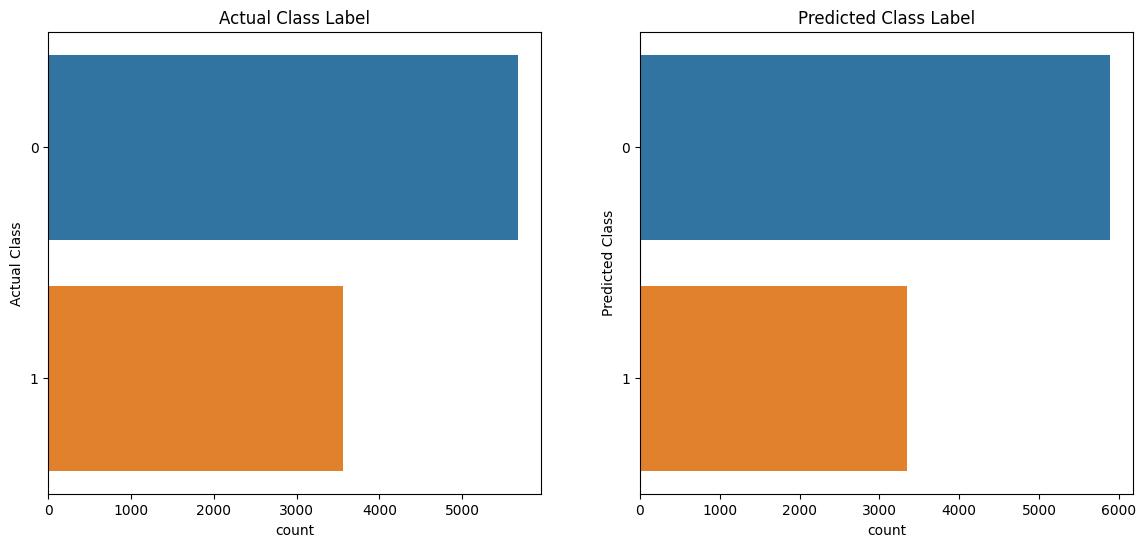

In [82]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title("Actual Class Label")
sns.countplot(y=predicted_df["Actual Class"])
plt.subplot(122)
plt.title("Predicted Class Label")
sns.countplot(y=predicted_df["Predicted Class"])